# Chennai Real Estate Price prediction 

### Using Python, Linear Regression Model and Angular

##### Importing necessary libraries

In [37]:
import pandas as pd
import math
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

#####  Reading the data set in csv format

In [38]:
df1 = pd.read_csv("../dataset/Chennai houseing sale.csv")
df1.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [39]:
df1.shape

(7109, 22)

In [40]:
df1.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [41]:
df1['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [42]:
df1['AREA'].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [43]:
df2 = df1.drop(['PRT_ID','DIST_MAINROAD','N_ROOM','DATE_SALE', 'DIST_MAINROAD',
        'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS'
       ], axis = 'columns')



df2['SALES_PRICE'] = df2['SALES_PRICE'].apply(lambda x: x/100000)
df2.head()


,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,SALES_PRICE
0,Karapakkam,1004,1.0,1.0,76.0000
1,Anna Nagar,1986,2.0,1.0,217.1777
2,Adyar,909,1.0,1.0,131.5920
3,Velachery,1855,3.0,2.0,96.3029
4,Karapakkam,1226,1.0,1.0,74.0625


## Data Cleaning

In [44]:
df2.isnull().sum()

AREA           0
INT_SQFT       0
N_BEDROOM      1
N_BATHROOM     5
SALES_PRICE    0
dtype: int64

In [45]:
df3 = df2.dropna()
df3.isnull().sum()

AREA           0
INT_SQFT       0
N_BEDROOM      0
N_BATHROOM     0
SALES_PRICE    0
dtype: int64

## Feature Engineering

In [46]:
df3['bhk'] = df3['N_BEDROOM'].apply(lambda x: int(math.floor(x)))
df3.bhk.unique()


C:\Users\iniya\AppData\Local\Temp\ipykernel_12616\2167738971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['N_BEDROOM'].apply(lambda x: int(math.floor(x)))


array([1, 2, 3, 4], dtype=int64)

In [47]:
df5 = df3.copy()
df5['price_per_sqft'] = df5['SALES_PRICE']*100000/df5['INT_SQFT']
df5.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,SALES_PRICE,bhk,price_per_sqft
0,Karapakkam,1004,1.0,1.0,76.0000,1,7569.721116
1,Anna Nagar,1986,2.0,1.0,217.1777,2,10935.433031
2,Adyar,909,1.0,1.0,131.5920,1,14476.567657
3,Velachery,1855,3.0,2.0,96.3029,3,5191.530997
4,Karapakkam,1226,1.0,1.0,74.0625,1,6040.986949


In [48]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

count     7103.000000
mean      8244.690407
std       2459.222673
min       2983.242134
25%       6375.688222
50%       7922.977178
75%       9828.804101
max      18543.860759
Name: price_per_sqft, dtype: float64

In [49]:
df5.to_csv("bhp.csv",index=False)

In [50]:
df5.location = df5.AREA.apply(lambda x: x.strip())
location_stats = df5['AREA'].value_counts(ascending=False)
location_stats

C:\Users\iniya\AppData\Local\Temp\ipykernel_12616\1596013172.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df5.location = df5.AREA.apply(lambda x: x.strip())


Chrompet      1699
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     785
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

### Outlier Reduction

In [51]:
df5[df5.INT_SQFT/df5.bhk<600].head()
df5.shape

(7103, 7)

In [52]:
df6 = df5[~(df5.INT_SQFT/df5.bhk<600)]
df6.shape

(6822, 7)

In [53]:
df6.price_per_sqft.describe()


count     6822.000000
mean      8267.710132
std       2454.858040
min       2983.242134
25%       6421.196225
50%       7936.767282
75%       9881.059264
max      18543.860759
Name: price_per_sqft, dtype: float64

In [54]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('AREA'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(4354, 7)

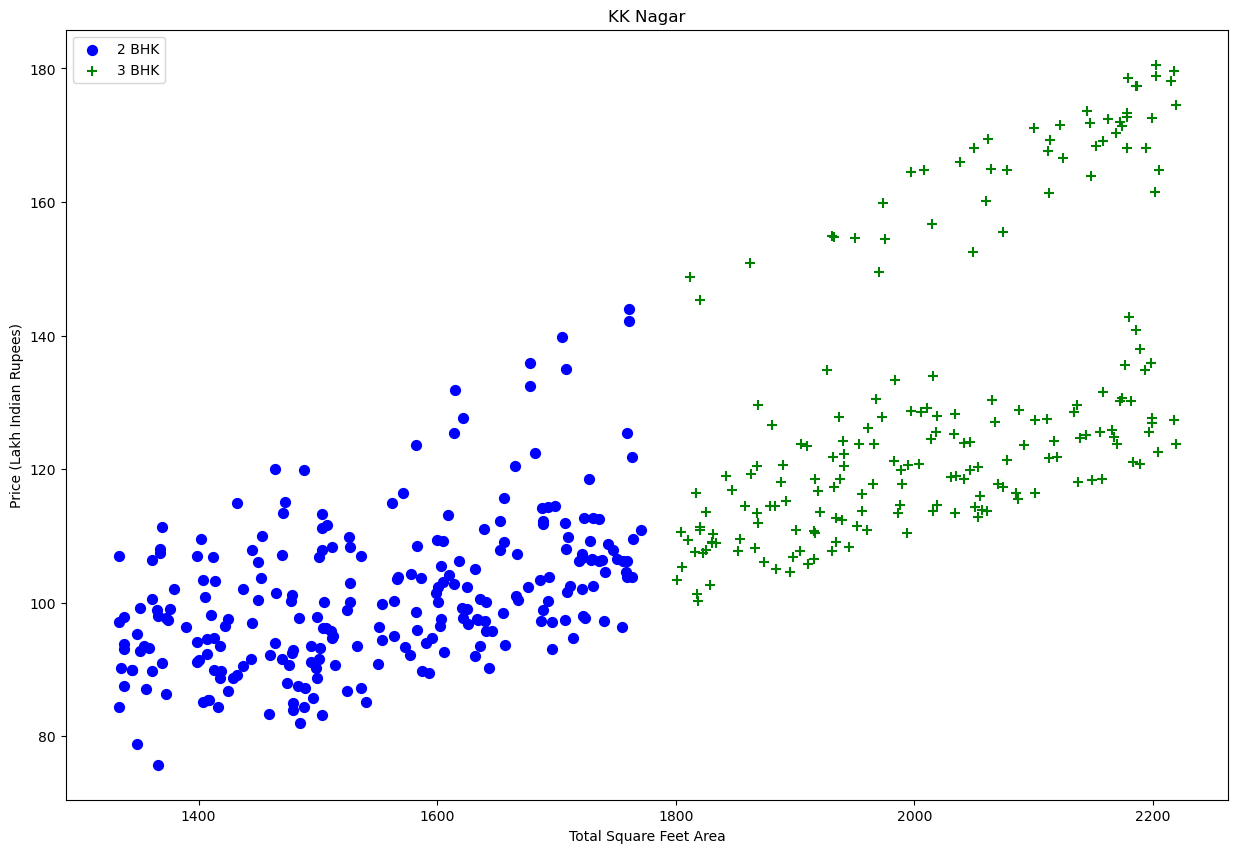

In [55]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.AREA==location) & (df.bhk==2)]
    bhk3 = df[(df.AREA==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.INT_SQFT,bhk2.SALES_PRICE,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.INT_SQFT,bhk3.SALES_PRICE,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"KK Nagar")

In [56]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('AREA'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(3309, 7)

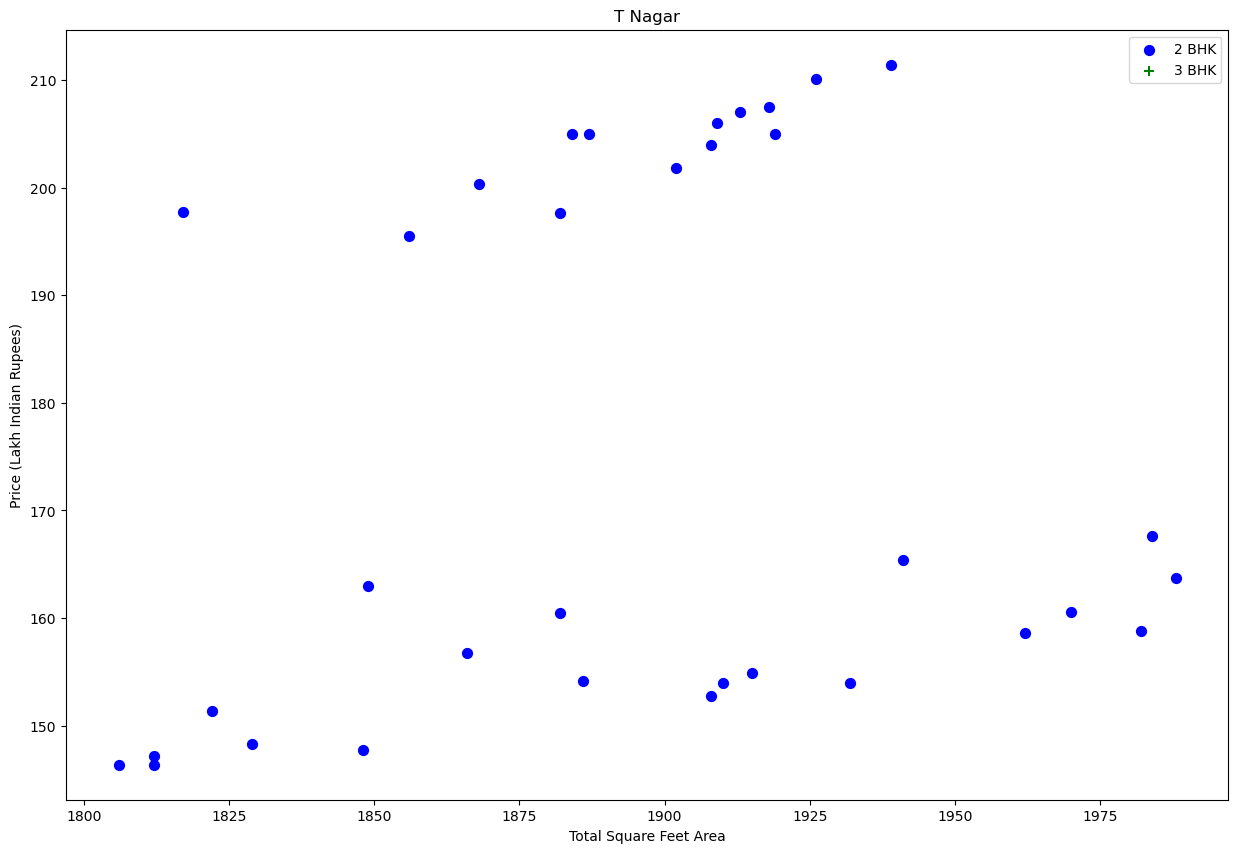

In [57]:
plot_scatter_chart(df8,"T Nagar")


Text(0, 0.5, 'Count')

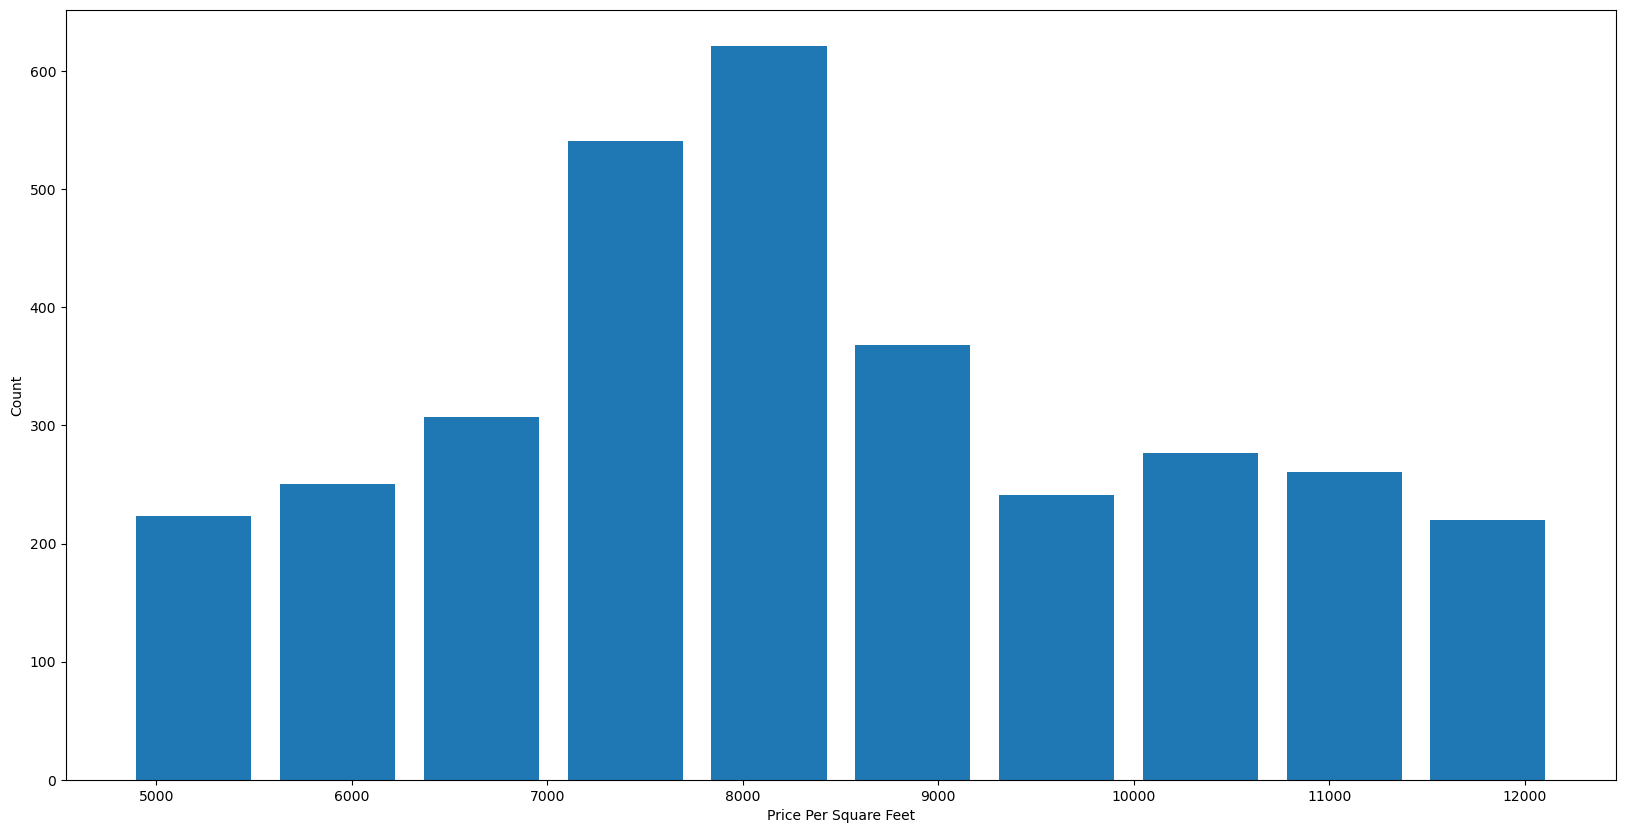

In [58]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [59]:
df8.N_BATHROOM.unique()

array([1., 2.])

In [60]:
df9 = df8[df8.N_BATHROOM<df8.bhk+2]
df9.shape

(3309, 7)

In [61]:
df10 = df9.drop(['N_BEDROOM','price_per_sqft'],axis='columns')
df10.head(3)

,AREA,INT_SQFT,N_BATHROOM,SALES_PRICE,bhk
0,Adyar,1056,1.0,93.86490,1
1,Adyar,1130,1.0,133.83350,1
2,Adyar,730,1.0,88.48285,1


In [62]:
dummies = pd.get_dummies(df10.AREA)
dummies.head(3)

,Adyar,Anna Nagar,Chrompet,KK Nagar,Karapakkam,T Nagar,Velachery
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0


In [63]:
df11 = pd.concat([df10,dummies],axis='columns')
df11.head()


,AREA,INT_SQFT,N_BATHROOM,SALES_PRICE,bhk,Adyar,Anna Nagar,Chrompet,KK Nagar,Karapakkam,T Nagar,Velachery
0,Adyar,1056,1.0,93.86490,1,1,0,0,0,0,0,0
1,Adyar,1130,1.0,133.83350,1,1,0,0,0,0,0,0
2,Adyar,730,1.0,88.48285,1,1,0,0,0,0,0,0
3,Adyar,868,1.0,90.42050,1,1,0,0,0,0,0,0
4,Adyar,718,1.0,55.70050,1,1,0,0,0,0,0,0


In [64]:
df12 = df11.drop('AREA',axis='columns')
df12.head(2)

,INT_SQFT,N_BATHROOM,SALES_PRICE,bhk,Adyar,Anna Nagar,Chrompet,KK Nagar,Karapakkam,T Nagar,Velachery
0,1056,1.0,93.8649,1,1,0,0,0,0,0,0
1,1130,1.0,133.8335,1,1,0,0,0,0,0,0


## Model Building 

In [65]:
X = df12.drop(['SALES_PRICE'],axis='columns')
X.head(3)

,INT_SQFT,N_BATHROOM,bhk,Adyar,Anna Nagar,Chrompet,KK Nagar,Karapakkam,T Nagar,Velachery
0,1056,1.0,1,1,0,0,0,0,0,0
1,1130,1.0,1,1,0,0,0,0,0,0
2,730,1.0,1,1,0,0,0,0,0,0


In [66]:
y = df12.SALES_PRICE
y.head(3)

0     93.86490
1    133.83350
2     88.48285
Name: SALES_PRICE, dtype: float64

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [68]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8220336066191847

In [69]:

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82632085, 0.84521895, 0.83143133, 0.82738241, 0.84338367])

In [70]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

E:\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardSca

,model,best_score,best_params
0,linear_regression,0.834747,{'normalize': True}
1,lasso,0.763142,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.732553,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [71]:
def predict_price(location,sqft,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [72]:

x = predict_price('KK Nagar',1000, 2, 2)

TypeError: predict_price() takes 3 positional arguments but 4 were given

In [73]:
predict_price('Chrompet',500,1)


E:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


68.84033223607591

In [74]:
predict_price('T Nagar',1500, 4)


E:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


184.3941598537158

In [75]:
predict_price('Anna Nagar',500,2)


E:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


70.33978868113037

In [76]:
predict_price('Karapakkam',1000,2)

E:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


92.84980082956702

In [ ]:
import pickle
with open('chennai_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))